# Final Project - House Sales Regression

Austin Mallie, Cynthia Portales-Loebell, Celina Velazquez
Shiley-Marcos School of Engineering, University of San Diego
ADS-500B Data Science Programming
Dr. Mohammad Yavarimanesh

In [ ]:
This project is a linear regression analysis for house sales data in King County, Washington from May 2014 to May 2015.

In [ ]:
This section imports the libraries that are needed.

In [69]:
import os
import pandas as pd
import numpy as np

##1. Data Importing and Pre-Processing
### Exploratory Data Analysis
Descriptive statistics

Feature Selection
Determine correlation to identify multicollinearity

Clean date field by determining the length of the field to determine if it is consistent, then trimming the last # characters. Manage blanks in bedrooms, bathrooms, sqft_living, sqft_lot field, need to know scale of condition variable (i.e. is 5 good or bad?). Need to understand difference between sqft_living, sqft_lot, sqft_living15, sqft_lot15. 

Determine the current working directory.

In [29]:
os.getcwd()

'C:\\Users\\celin\\OneDrive\\Education\\USD-MS-ADS\\ADS-500B-Programming-for-Data-Science\\aa_Final-Project\\GitHub\\house_sales_regression'

Import the data file and display the records.

In [15]:
sales = pd.read_csv("house_sales.csv")
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Display the dimensions of the dataframe. There are 21613 records and 21 columns.

In [80]:
sales.shape

(21613, 21)

Display data types for columns in dataframe. There are 12 int64 (i.e. integer) variables, 8 float64 (i.e. continuous variables), and one object (i.e. string) variable. The date field is a string variable which has been imported as the incorrect type, and requires cleaning.

In [90]:
sales.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Calculate summary statistics for the dataset.

In [49]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Calculate the number of null values in each field.

In [22]:
sales.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Remove the extra characters from the date field.

In [33]:
sales['date'].str[:-7]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

Format the date field as a date data type.

In [35]:
sales['date'] = pd.to_datetime(sales['date'])

Confirm the change by checking data type of date field. The change is confirmed.

In [37]:
sales.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Create a Pearson Correlation Coefficient matrix to determine whether there is multicollinearity between variables to determine feature selection. Variables that are highly correlated will be analyzed for removal.

In [41]:
sales.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.003478,0.002095,-0.011733,-0.133237,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.014810,-0.034700,-0.033861,0.005438,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.310823,0.526600,0.701579,0.088422,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.003478,-0.014810,0.310823,1.000000,0.515814,0.575974,0.028413,0.178472,-0.004474,0.082579,...,0.359268,0.478380,0.302168,0.156249,0.019990,-0.154337,-0.009264,0.130509,0.392849,0.025323
bathrooms,0.002095,-0.034700,0.526600,0.515814,1.000000,0.754229,0.086867,0.501394,0.068412,0.186092,...,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011733,-0.033861,0.701579,0.575974,0.754229,1.000000,0.168363,0.355316,0.107053,0.284038,...,0.763833,0.875966,0.432535,0.319783,0.057034,-0.199637,0.051092,0.239572,0.756901,0.181697
sqft_lot,-0.133237,0.005438,0.088422,0.028413,0.086867,0.168363,1.000000,-0.005682,0.021173,0.074342,...,0.111713,0.181152,0.015569,0.052165,0.008996,-0.131311,-0.087750,0.229369,0.145112,0.728800
floors,0.018525,-0.022491,0.256794,0.178472,0.501394,0.355316,-0.005682,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.004474,0.068412,0.107053,0.021173,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.082579,0.186092,0.284038,0.074342,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


The *sqft_living* and *sqft_lot field* appear to be very similar to the *sqft_living15* and *sqft_lot15* fields. According to the Pearson Correlation Coefficient matrix, the correlation between *sqft_living* and *sqft_living15* is 0.756901. Similarly, the correlation coefficient between *sqft_lot field* and *sqft_lot15* is 0.728800. According to Pennsylvania State University (2018), "multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated with one another". In addition, a correlation coefficient of .8 or higher indicates multicollinearity. The values of ~.76 and ~.73 indicate moderate to high multicollinearity, and, as a result, these variables will be dropped.

In [53]:
sales1 = sales.drop(['sqft_living15', 'sqft_lot15'], axis=1)
sales1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In the next step, *bathrooms*, *grade*, and *sqft_above* have correlation coefficients of 0.754229, 0.763833, and 0.875966, respectively, with *sqft_living*. This indicates the presence of multicollinearity with this variable. In this model, we will remove these variables, however, it would be beneficial to test a separate model using these variables in place of sqft_living to compare models.

In addition, because a geospatial analysis is not part of this study, the *lat* and *long* variables will be removed.

Categorical variables (i.e. *id*, *date*, *zipcode*) and the *date* field will also be removed in the next step since these values are not valid in a regression analysis.

In [55]:
sales2 = sales1.drop(['bathrooms', 'grade', 'sqft_above', 'lat', 'long', 'id', 'date', 'zipcode'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_lot', ylabel='price'>,
        <Axes: xlabel='floors', ylabel='price'>,
        <Axes: xlabel='waterfront', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='condition', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>,
        <Axes: xlabel='yr_built', ylabel='price'>,
        <Axes: xlabel='yr_renovated', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_lot', ylabel='bedrooms'>,
        <Axes: xlabel='floors', ylabel='bedrooms'>,
        <Axes: xlabel='waterfront', ylabel='bedrooms'>,
        <Axes: xlabel='view', ylabel='bedrooms'>,
        <Axes: xlabel='condition', ylabel='bedrooms'>,
   

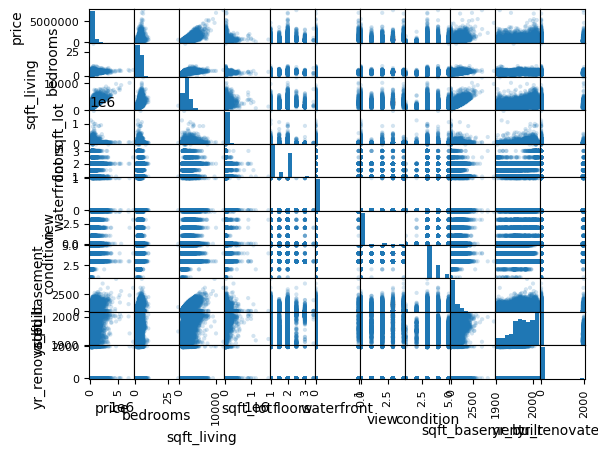

In [57]:
pd.plotting.scatter_matrix(sales2, alpha=0.2)

Construct new variable for the age of the house using the yr_built variable.

In [65]:
sales2['age'] = 2024 - sales2['yr_built']
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991,73
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0,20


Calculate recency of renovation using the yr_renovated variable if the house was renovated, otherwise, use the age of the house.

In [73]:
sales2['age_reno'] = np.where(sales['yr_renovated'] != 0, 2024 - sales2['yr_renovated'], age)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age,age_reno
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0,69,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991,73,33
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0,91,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0,59,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0,15,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0,10,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0,15,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0,20,20


Now that we have constructed new features using the ordinal variables *yr_built* and *yr_renovated*, we can now remove these variables. In addition, to prevent multicollinearity between the newly constructed variables, *age* and *age_reno*, *age* will be dropped, and *age_reno* will be used as a proxy.

In [75]:
sales2 = sales2.drop(['yr_built', 'yr_renovated', 'age'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,33
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,20


#References

Pennsylvania State University. (2018). 10.4 - multicollinearity. 10.4 - Multicollinearity | STAT 462. https://online.stat.psu.edu/stat462/node/177/ 